# CarDekho Used Car Price Prediction
### Cleaning, PreProcessing and EDA

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sns
from six.moves import urllib
import csv
%matplotlib inline

warnings.filterwarnings("ignore")

df = pd.read_csv('cardekho_dataset.csv')

#Delete 'Unnamed: 0' column:
df.drop(df.columns[0], axis =1, inplace=True)

In [67]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [68]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [113]:
print('The size of the Dataframe is:', df.shape)
print('-'*50)

The size of the Dataframe is: (15411, 13)
--------------------------------------------------


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [70]:
#Check for missing values

print(df.isnull().sum())

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


#### There are no missing values in the dataset therefore no need to clean the data

## Analysis of Numerical Features:

In [102]:
num_ft= [feature for feature in df.columns if df[feature].dtype != 'O']
print("The Numerical Features are:", '\n', num_ft)

The Numerical Features are: 
 ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


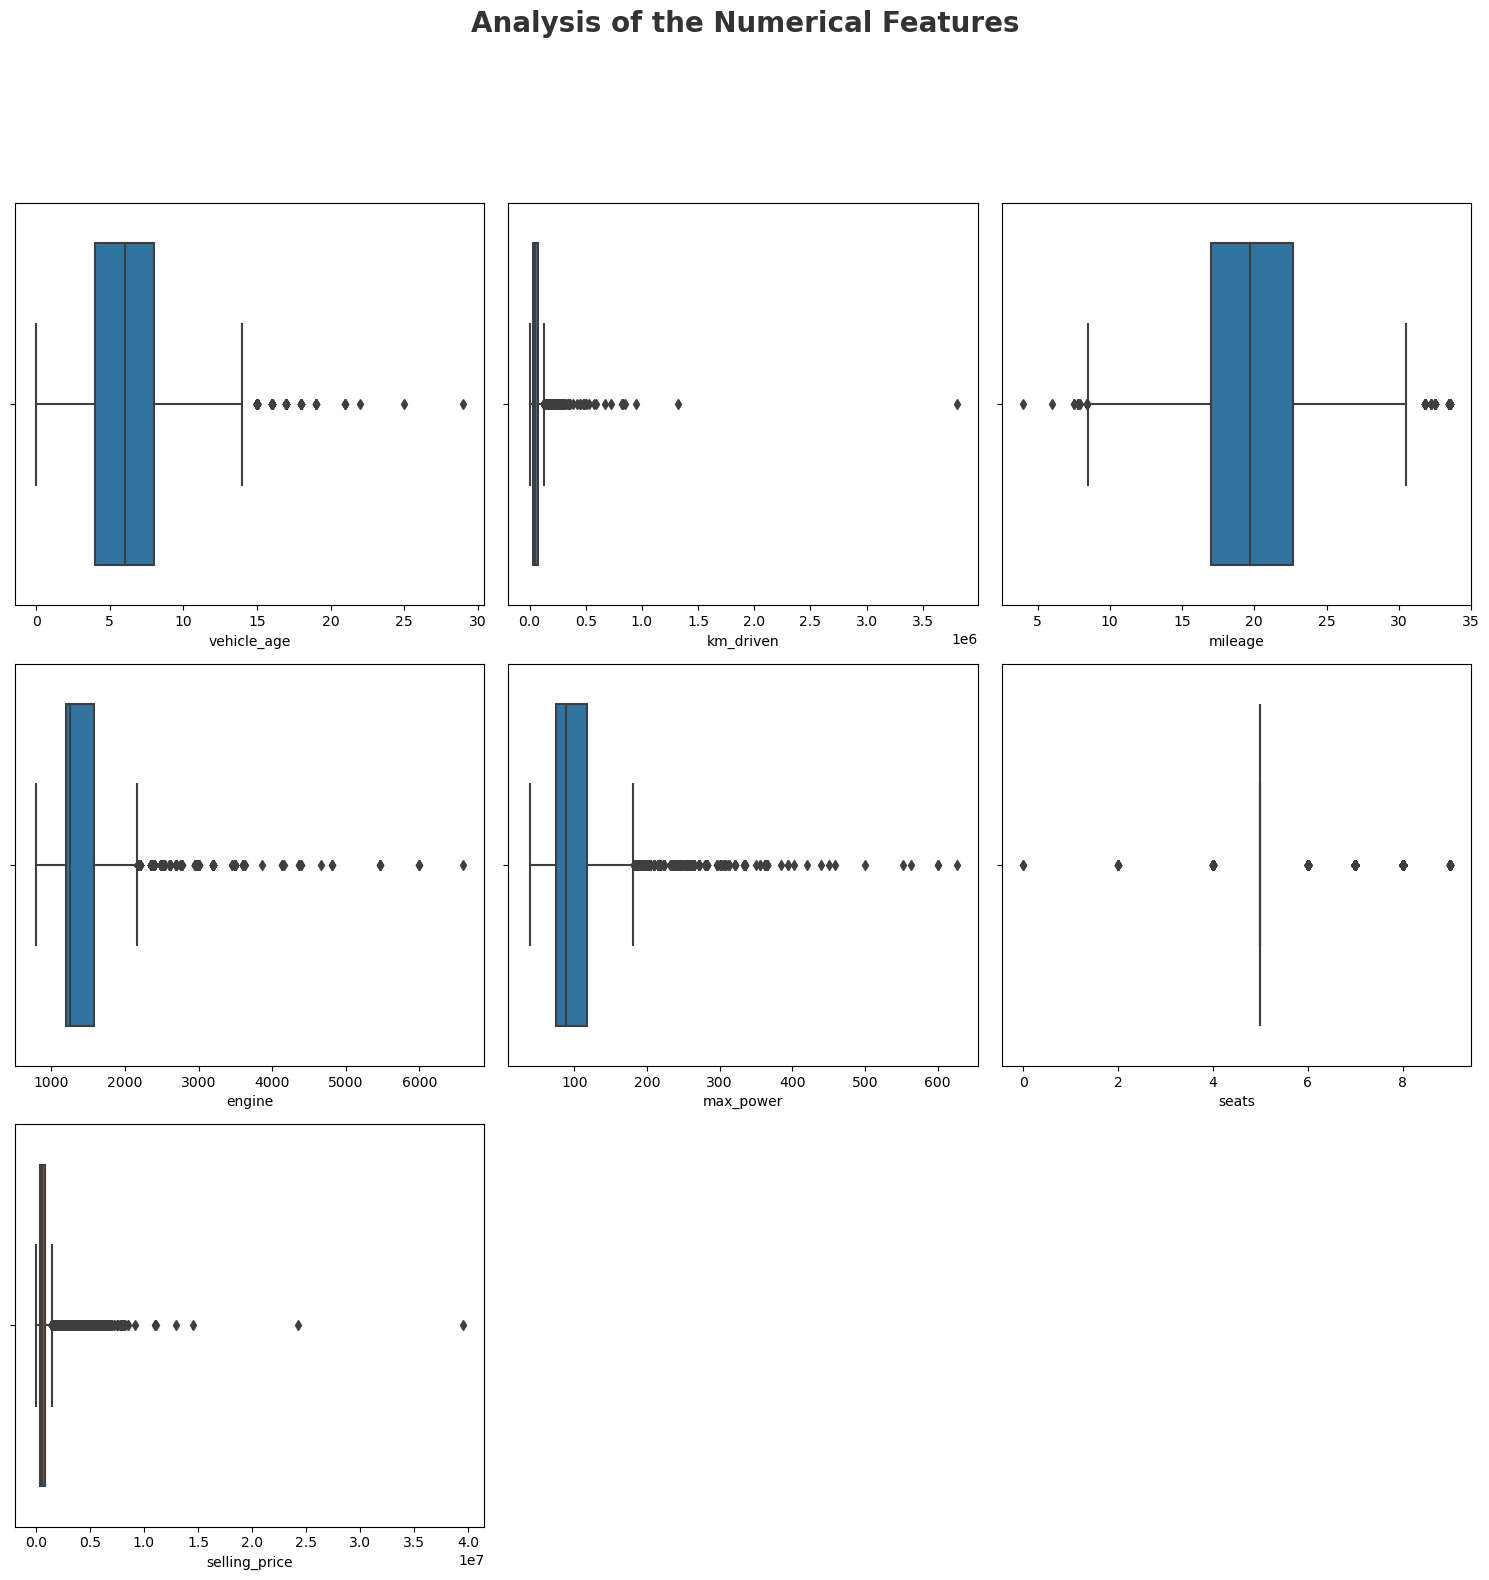

In [130]:
#Numerical Features Analysis:

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Analysis of the Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.05)

for ax, feature in zip(axes.flatten()[:7], num_ft[:7]):
    sns.boxplot(x=df[feature], ax=ax)
    ax.set_xlabel(feature)

# Remove the last two empty plots 
for ax in axes.flatten()[7:]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Conclusions of the Numerical Features:
- vehicle_age, km_driven, engine, max_power and selling_price are all right and positively skewed.

## Analysis of Categorical Features:

In [104]:
cat_ft = [feature for feature in df.columns if df[feature].dtype == 'O']
print("The Categorical features are:", '\n', cat_ft)

The Categorical features are: 
 ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


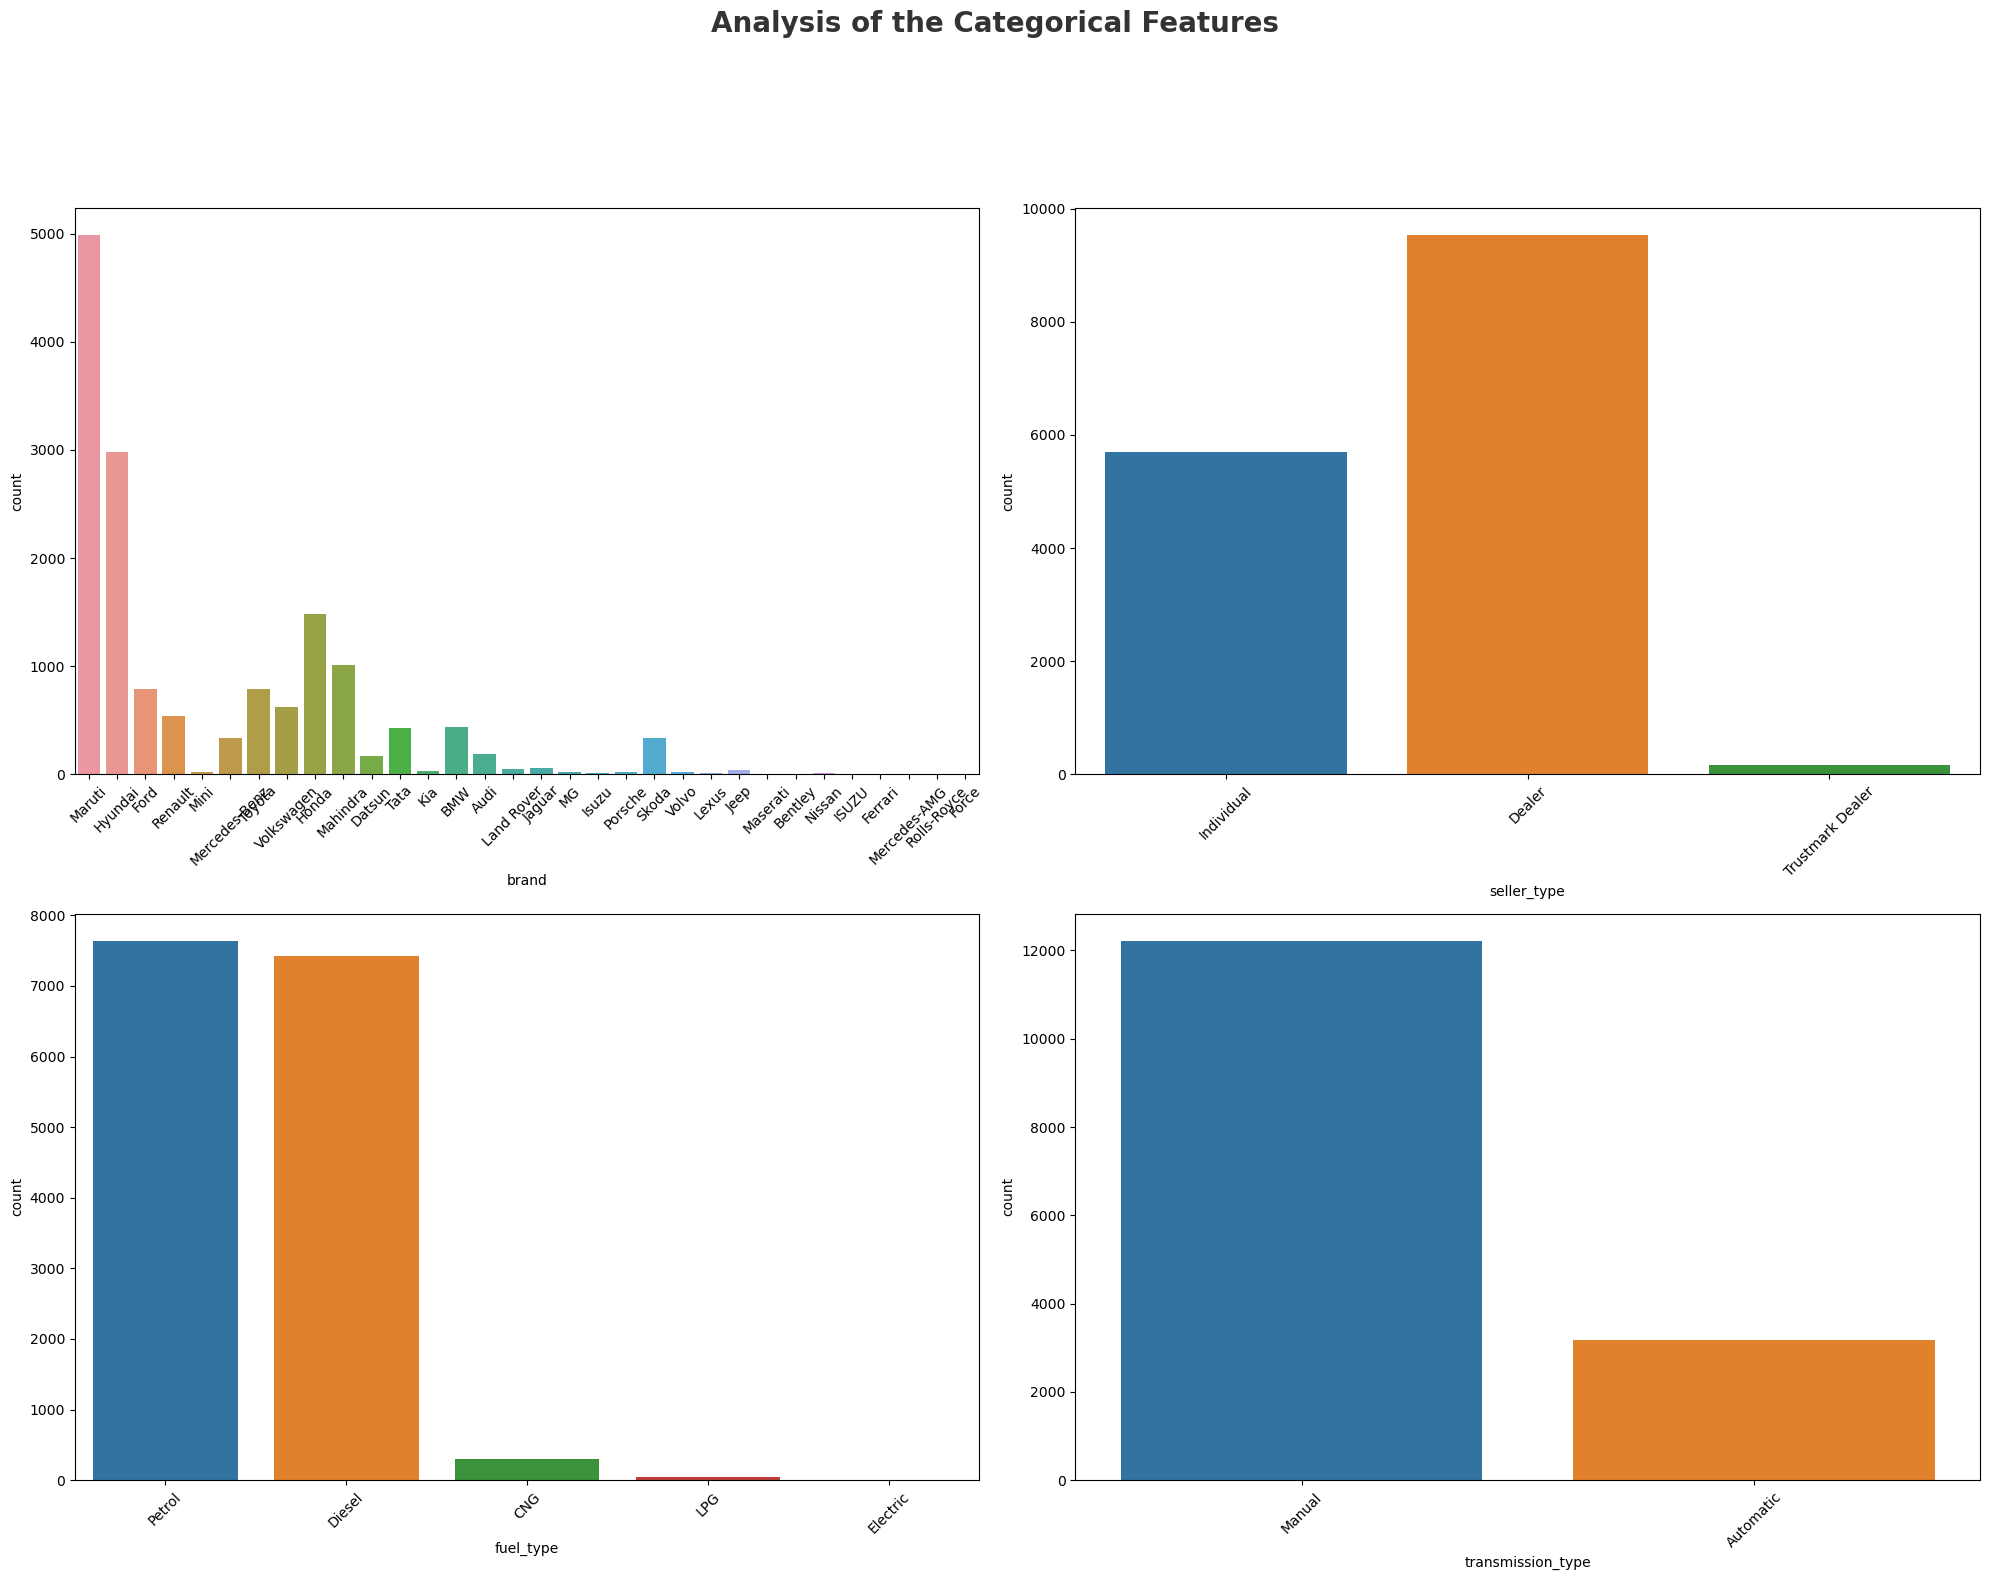

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Analysis of the Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.05)

#Remove car_name and model categories
cat_ft1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']

for ax, feature in zip(axes.flatten(), cat_ft1):
    sns.countplot(x=df[feature], ax=ax)
    ax.set_xlabel(feature)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Conclusions of the Categorical Features:
- Most of the cars are of brand Maruti
- Majority of the seller_types are Dealers
- The two most common fuel types are Diesel and Petrol
- There are more cars with manual transmission type sold than there are with automatic transmission type

## The Correlation of Numerical/Categorical Features and selling_price

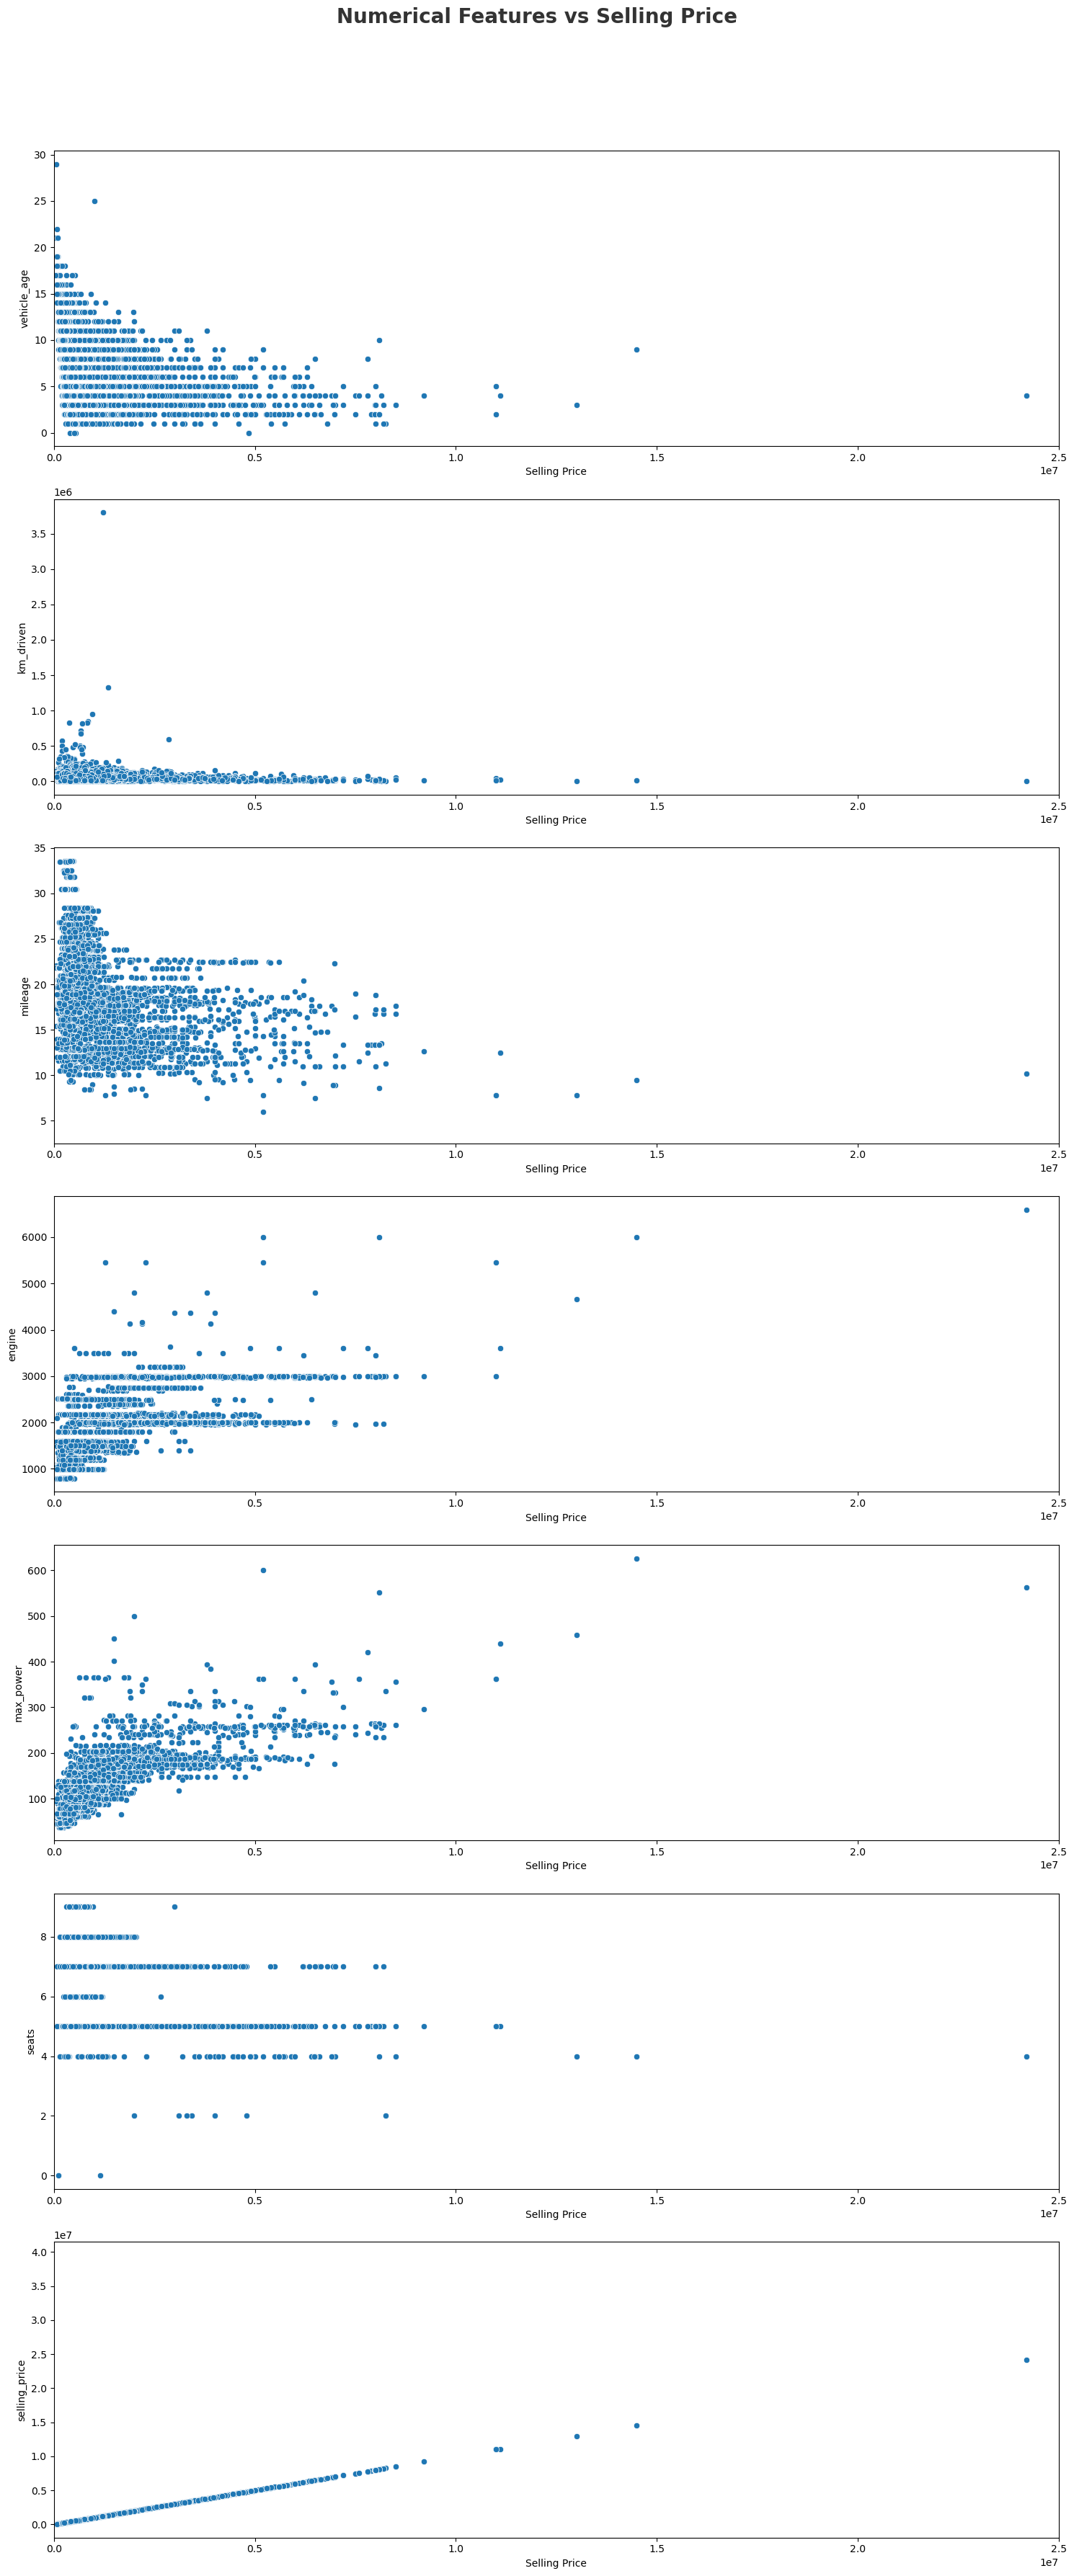

In [127]:
fig, axes = plt.subplots(len(num_ft), 1, figsize=(15, len(num_ft) * 5))
fig.suptitle('Numerical Features vs Selling Price', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for ax, feature in zip(axes, num_ft):
    sns.scatterplot(x=df['selling_price'], y=df[feature], ax=ax)
    ax.set_xlabel('Selling Price')
    ax.set_ylabel(feature)
    ax.set_xlim(0, 25000000)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.xlim(0, 25000000)
plt.show()

### Conclusions: 
- Below are the factors of used cars that can increase their selling prices:
    - Younger vehicles
    - Vehicles with low Km driven
    - Vehicles that have lower mileage
    - Vehicles with higher engine CC
    - Vehicles with higher max_power
    - Vehicles with more than 2 seats